# Arabidopsis Gene Classifier
**This is an Neural Network that has been trained on the Arabidopsis Genome to predict the idenitity of any DNA sequence. **
## Pipeline:
1. Encode DNA Sequence: Vectorize by counting hexamers, or embed using DNABERT
2. Embedding is fed to NN
3. Softmax is applied to NN output to generate a probability distribution of the type of DNA sequence

## Instructions:
Input your DNA sequence in the first cell and then go to `Runtime` and then `Run all`
- Note: The notebook will take care of all dependencies and etc.

In [1]:
#@title Input Sequence Here!
sequence = "\"ATCGATCGATCGATCG\"" # @param {type:"string"}
high_accuracy_mode = True # @param {type:"boolean"}

In [2]:
#@title Installing Dependencies
!pip uninstall -y transformers
!pip install transformers==4.29
!pip install einops
!pip uninstall -y triton

# Download Embedding the Model
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)
model = AutoModel.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)

# Download my Model
!git clone https://github.com/pdpppd/DNAClassifierArabidopsis
!mv /content/DNAClassifierArabidopsis/model.pth /content
!rm -rf DNAClassifierArabidopsis/

Found existing installation: transformers 4.38.2
Uninstalling transformers-4.38.2:
  Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.1 MB/s eta 0:00:00
Found existing installation: triton 2.2.0
Uninstalling triton-2.2.0:
  Successfully uninstalled triton-2.2.0


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/168k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

configuration_bert.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- configuration_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


bert_layers.py:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

bert_padding.py:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- bert_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


flash_attn_triton.py:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- flash_attn_triton.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- bert_layers.py
- bert_padding.py
- flash_attn_triton.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/468M [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/zhihan1996/DNABERT-2-117M/d064dece8a8b41d9fb8729fbe3435278786931f1/bert_layers.py:126: UserWarning: Unable to import Triton; defaulting MosaicBERT attention implementation to pytorch (this will reduce throughput when using this model).
  warnings.warn(
Some weights of the model checkpoint at zhihan1996/DNABERT-2-117M were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly

Cloning into 'DNAClassifierArabidopsis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 20.00 MiB | 3.29 MiB/s, done.


Using device: cpu


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
<ipython-input-4-5e5f1c75b790>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[str(cls) for cls in label_encoder.classes_], y=probabilities, palette="Blues_d")


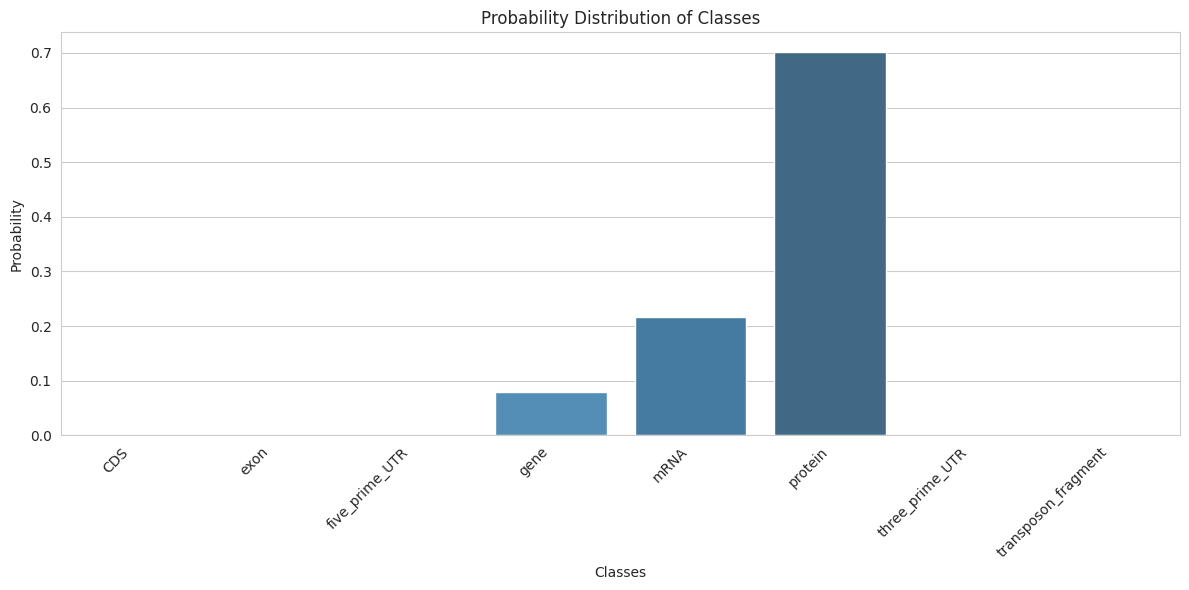

In [4]:
#@title Run the model
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cpu")
print(f"Using device: {device}")

def generate_embedding(sequence, pooling='mean'):
    inputs = tokenizer(sequence, return_tensors='pt')["input_ids"].to(device)
    with torch.no_grad():
        hidden_states = model(inputs)[0]

    if pooling == 'mean':
        embedding = torch.mean(hidden_states, dim=1)
    elif pooling == 'max':
        embedding = torch.max(hidden_states, dim=1)[0]
    else:
        raise ValueError("Unsupported pooling method")

    return embedding.squeeze().cpu().tolist()

# Assuming ComplexNN class definition is here (copy from the training script)
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)  # First layer with 1024 units
        self.fc2 = nn.Linear(1024, 2048)  # Second layer with 2048 units
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 512)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

def load_model(model_path):
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))  # ensure 'map_location' is set if you are switching devices
    label_encoder = checkpoint['label_encoder']
    num_classes = len(label_encoder.classes_)
    model = NN(input_size=768, num_classes=num_classes)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model, label_encoder

def predict_and_plot(model, vector_list, label_encoder):
    # Convert the Python list of integers to a NumPy array of type float32
    vector_np = np.array(vector_list, dtype=np.float32)

    # Convert the NumPy array to a PyTorch tensor and add a batch dimension
    vector_tensor = torch.tensor(vector_np).unsqueeze(0)  # Unsqueeze adds the batch dimension

    # Forward pass
    with torch.no_grad():
        outputs = model(vector_tensor)
        probabilities = F.softmax(outputs, dim=1).numpy().flatten()

    # Use Seaborn for plotting
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x=[str(cls) for cls in label_encoder.classes_], y=probabilities, palette="Blues_d")
    plt.xticks(rotation=45, ha="right")  # Rotate labels and align right for better visibility
    plt.ylabel('Probability')
    plt.xlabel('Classes')
    plt.title('Probability Distribution of Classes')
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()


seq = "GAAACAAGATTTCAATTCTCAAATGAAGCTGGTTACACACAGAACATACACAATAACACAAATAGTTGTAGCGTAACCCCACTCAAAATTCTAAACCCTAGCATGCGCACCTATTATTTCGTAATTAAAAACAGCAGTCACAAAAGGTGAGTAAGATCGATATAGAGAGGGTACCTGATCTAGAGAGGGTACCTGATTGTGAAGGAGGAGAGTGAGTAAATGTTTGTGCTACTTTAGATAAACTGCATACCATGTTTTTAAAATTGTGTTCTTTGATTGACTGGAGAATCACGGAGTTGACTGCCGTTGAAACATTCGCCGTTGACTTTGTCGACGCCGGGCGGGATGCTAAGATGCGCCGTTAGTGTTGGCATATGATCTACATTTTTATTTAGATGATAAGTGCTGCATTTTTCATAGAGTTGATGAAAGGTCTCTTTTTGGGGATCTGCTTTTTCTTGAAGAGATGTTTTTTGAAAGCATAAGTTTAATACCAGATTATTTATATTATTATAAATAATTTGTGTAAACGCATCTTAGGTGGATCTTTAGACTGTAATTTGGGTTAATCTAGCCAAATTGCGTGAAGAGATTTCAATTTGGTTGTGCTCATAAACCAAGTAGGAGTTTTATTAGCATCATAAAAATTGAAGCTACATATTAATTGGCACCCTCCATGGGAGTTGCTCGCATGCTACACTTCTCTACTGCTCTTAAAAGCTACTTATCATTACCTTACTTTTGGTTAGTCGTCCTCTGTTCTTTGTTTCTAACAGAAAAAGATGCTTTGCATACTTTTATTGTTACTCGCTTCATGTTTTTGCTCTAACAGAATGCCCATTTCCTCATATTTCTCTTCTGCCTTGTGTACATGTTAGAGACAATAATTTTGTGGTAAAATCCATTTCACTATATATATTCCACATGATGCATATGCTCCTTTCTAACCTTGATATACAAAAGAAAAGACTAATGGCGTTGTTAGCTATAGAAATATTTCAACATAAATTCATACTTTGCCTAGCTTTTTCTGTTTTTGTTAGTAGCTGCCAACTAGTTAGCGGTGATGAGTTGGCATTCTTTGCCAGGCTTAATCTTCCAACAGGGGCAAGGGGTCCAGAATCTCTTGCTTTCAACGGCAAGGGGGACGAGTTTTATACCGGTGTATCTGATAGTAGAATCCTCAAGTATGAGTTGGCGAATCATGCTTTCGTCAATTTTGCAACCACCTCACCTCTCAGGTAAATTTTGCATCAGTTGTGCTTTTCGCCTTTGCAATAAGGAGCTGTTTGAATAAGCTTATTTTTCAGAAATAAGAGCTTATATTTGGAGATCTATTTTTTCCTGAAATAAGCCCTTTTGTTTGTCAAATAACGAATATGAAACACTTGTTTAACATTTATATCCAAAAATATTATAAAAAGATGCATTTATTTTTATAAAAATAAGCCTTAAATTTGATAAGTATGATCTGGCAAACGGGTGCTAAGTTTGAAGGAGAAATTAGCTACTTATAATAATGATATTAGCCTTCTCCAGACGGACAGACACCATTTGAATGCATAGTGTAGCATAGTTGAAGATCAAGTTTTGGGGAATGATATTGAAATTATAATCACCCATCCATTTTCAGGAACAAAGCAATTGGTGATGACAGAAACGATACAAAATTGGGAGAAGCTCCTTGTAGGCCATTAGGAGTCGCAATCAACTACAATAATGGTGACCTTTATATTGCGGATGGTGTATGTGGACTAGCTGTAGTGGGTTCAAATGGAGGTGTTGCCAATACAATTGCCAACAGCGTTAATGGCATTCCTCTTCTGTTTCCCAATGCCATTGATATCGATCCAAAAACAGAAACTGTTTATTTTACAGATGCTGGCTCTATTTTTCAGAAAAGGTTGATCACACACATATGTTGCTTCTTTTTCCAATCAAGCTTATGCTCTATATTCATTGAGTTTATTCTGTTTGTCTTTGAAATGTTGCAGTATGGACATTATAGAAATACTCTCAAGTGGAGACACGAGTGGAAAATTGCTCAAATATGATCCACAAACCAAACAAATTTCAGTGTTGCTAACAGAACTTTCTGGTGCAACTGGTGTAGCGGTTAGTGGAGATGGAGCTTTTGTGCTTGTTTCGGAGTACATTGCCAAGCAAATCCGCAGATACTGGATTAGAGGACCGCTAGCCGGAACATCAGACATATTTATTGAACTTGCAGGGAGCCCTGATAACATCAAAAGGACCGTGTTGGGAGATTTCTGGGTTGCAGTGACCATGGTGGATTTGCAGCTAGCTGTACCAATACTGGTGCCTTTCGGACAAAGAATAAATCCTATTGGTGTAATTCTGGAGAACTTTAGTCTTGAGGTGCAATACAGAAATGCAATTGTTAGTGAGGTTCAAGAAAATGCATGGGGAATATTTGTTGGAACCCTTTTAGGGAGTTCTGTTGGAATTTACAGAAGATAGTAATAACAAATTTATAACAATAAAACATTAGAGAACA"

vector = generate_embedding(seq)

model, label_encoder = load_model('model.pth')
predict_and_plot(model, vector, label_encoder)


